In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

%matplotlib inline

132


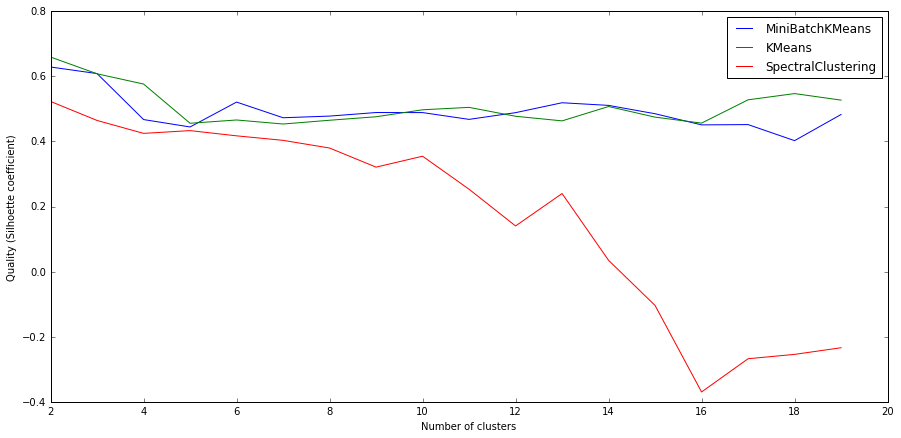

In [2]:
coord_list = []

with open('filtered_processed_table_two', 'rb') as f:
    coord_list = pickle.load(f, encoding='latin1')

print(len(coord_list))
    
clusters_range = np.arange(2, 20)
methods_str = ['MiniBatchKMeans', 'KMeans', 'SpectralClustering']
clustering_methods = list(enumerate(methods_str))
clustering_quality = [[] for _ in clustering_methods]

for cluster_count in clusters_range:
    for position, method in clustering_methods:
        clustering_method = eval(method + '(n_clusters=cluster_count, random_state=42)')
        clustering_method.fit(coord_list)
        clustering_quality[position].append(silhouette_score(np.array(coord_list), clustering_method.labels_))

plt.figure(figsize=(15, 7))
plt.xlabel('Number of clusters')
plt.ylabel('Quality (Silhoette coefficient)')

for method_quality in clustering_quality:
    plt.plot(clusters_range, np.array(method_quality))

plt.legend(methods_str, loc='best')
